## 1. Salaries in data field

Go to [kaggle and download this dataset on job salaries in the data field](https://www.kaggle.com/datasets/adilshamim8/salaries-for-data-science-jobs). In this exercise it is many cases easier to solve the exercises if you combine duckdb with pandas for analysis.

&nbsp; a) Start with some simple EDA, check summary statistics, info, columns etc

&nbsp; b) Plot the distribution of the salaries in USD.

&nbsp; c) How many job postings are there for each job title? Take the tenth most common job title and plot a bar chart of the number of job postings for that title.

&nbsp; d) Create a dataframe that contains the following columns: job_title, experience_level, median_salary_usd, mean_salary_usd, mean_salary_sek. Sort the dataframe by mean_salary_sek.

&nbsp; f) Create a column with salary in SEK per month and make the distribution of salaries in SEK per month for all job postings

&nbsp; g) Now create distributions of monthly SEK based on different experience levels, do you see any trends?

&nbsp; h) Find median monthly swedish salary for more common job_titles. Think what common may mean here.

&nbsp; i) Join the country_codes.csv to the dataset get the actual country names. Find the median monthly salary in SEK for each country and the number of job postings.

In [3]:
import pandas as pd

df = pd.read_csv("../../data/salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
151440,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
151441,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
151442,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
151443,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,151445.000000,1.514450e+05,151445.000000,151445.000000
mean,2024.435313,1.628380e+05,157527.458411,20.938625
std,0.671842,2.080124e+05,74150.772377,40.620393
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105800.000000,0.000000
50%,2025.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [8]:
df.shape

(151445, 11)

In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


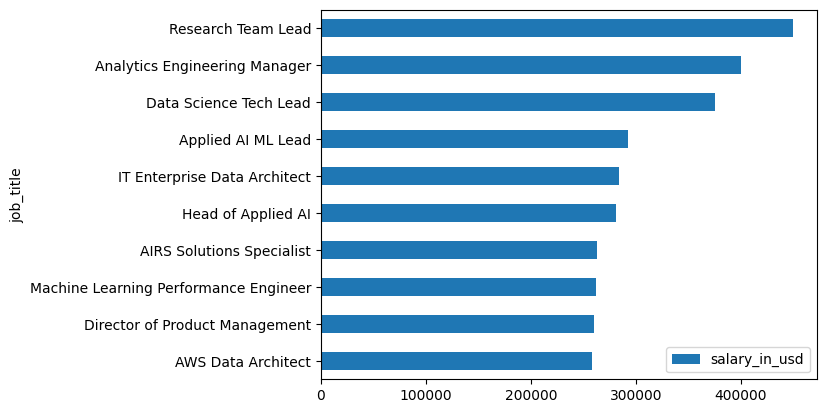

In [42]:
# b) Plot the distribution of the salaries in USD.
salary_distribution = df.groupby("job_title")["salary_in_usd"].median().reset_index().sort_values(by="salary_in_usd", ascending=False).head(10)
ax = salary_distribution.plot(kind="barh", x="job_title", y="salary_in_usd")
ax.invert_yaxis()

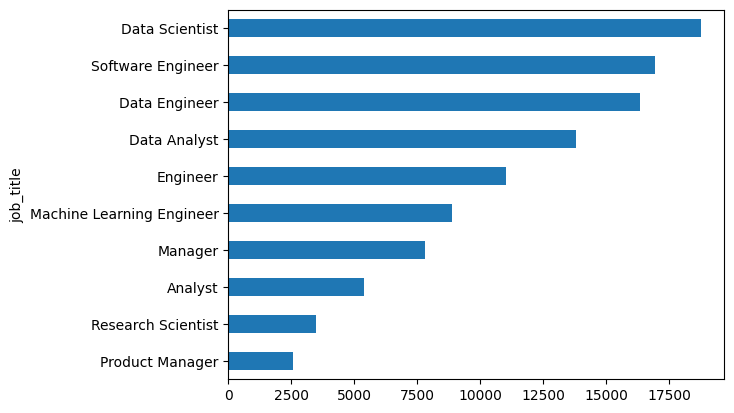

In [ ]:
# c) How many job postings are there for each job title? Take the tenth most common job title and plot a bar chart of the number of job postings for that title.
most_common_jobs = df["job_title"].value_counts().head(10)
ax = most_common_jobs.plot(kind="barh", x="job_title", y="count")
ax.invert_yaxis()


In [43]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M
5,2025,MI,FT,Engineer,140000,USD,140000,US,100,US,M
6,2025,SE,FT,AI Product Lead,175000,USD,175000,US,100,US,M
7,2025,SE,FT,AI Product Lead,152900,USD,152900,US,100,US,M
8,2025,SE,FT,AI Engineer,97900,USD,97900,US,100,US,M
9,2025,SE,FT,AI Engineer,89900,USD,89900,US,100,US,M


In [ ]:
# d) Create a dataframe that contains the following columns: job_title, experience_level, median_salary_usd, mean_salary_usd, mean_salary_sek. Sort the dataframe by mean_salary_sek.
new_df = (df.groupby(["job_title", "experience_level"]).agg(median_salary_usd=("salary_in_usd", "median"), mean_salary_usd=("salary_in_usd", "mean")).reset_index())
new_df["mean_salary_sek"] = new_df["mean_salary_usd"] * 

# f) Create a column with salary in SEK per month and make the distribution of salaries in SEK per month for all job postings
# g) Now create distributions of monthly SEK based on different experience levels, do you see any trends?
# h) Find median monthly swedish salary for more common job_titles. Think what common may mean here.
# i) Join the country_codes.csv to the dataset get the actual country names. Find the median monthly salary in SEK for each country and the number of job postings.

,job_title,experience_level,median_salary_usd,mean_salary_usd
0,AI Architect,EX,215936.0,215936.000000
1,AI Architect,MI,800000.0,800000.000000
2,AI Architect,SE,190400.0,208015.487805
3,AI Content Writer,EN,30000.0,30000.000000
4,AI Content Writer,MI,45760.0,45760.000000
...,...,...,...,...
932,Technology Integrator,SE,98650.0,98650.000000
933,Trainee,EN,56000.0,52927.500000
934,Web Developer,EN,22584.0,22584.000000
935,Web Developer,MI,119537.5,119537.500000
